In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [10]:
data = pd.read_csv('../Kidney Disease/files/kidney_disease.csv')
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [12]:
data.drop('id',axis=1,inplace=True)

In [13]:
# rename column names to make it more user-friendly

data.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [14]:
data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [15]:
data.duplicated().sum()

0

In [16]:
data.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume          object
white_blood_cell_count      object
red_blood_cell_count        object
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                       object
dtype: object

In [17]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [19]:
# cat_col = [ col for col in data.columns if data[col].dtype == "object"]
# num_col = [col for col in data.columns if data[col].dtype != 'object']

In [20]:
# cat_col

In [21]:
# num_col

In [22]:
#for col in cat_col:
# for col in data.columns:
#     print(f"{col} has {data[col].unique()} values\n")
for col in data.columns:
    if data[col].dtype == 'object':
        unique_values = data[col].unique()
        print(f"{col} has the following unique values: {unique_values}\n")

red_blood_cells has the following unique values: [nan 'normal' 'abnormal']

pus_cell has the following unique values: ['normal' 'abnormal' nan]

pus_cell_clumps has the following unique values: ['notpresent' 'present' nan]

bacteria has the following unique values: ['notpresent' 'present' nan]

packed_cell_volume has the following unique values: ['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']

white_blood_cell_count has the following unique values: ['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 

In [23]:
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'],errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'],errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'],errors='coerce')

In [24]:
cat_col = [ col for col in data.columns if data[col].dtype == "object"]
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [25]:
for col in cat_col:
    print(f"{col} has {data[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has ['ckd' 'ckd\t' 'notckd'] values



In [26]:
data["diabetes_mellitus"].replace(to_replace={'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
data['coronary_artery_disease'].replace(to_replace={'\tno':'no'},inplace=True)
data["class"].replace(to_replace={'ckd\t': 'ckd', 'notckd': 'not ckd'},inplace=True)

In [27]:
data['class'] = data['class'].map({'ckd':0,'not ckd':1})

In [28]:
data['class'] = pd.to_numeric(data['class'],errors='coerce')

In [29]:
for col in cat_col:
    print(f"{col} has {data[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values

class has [0 1] values



In [30]:
data.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
peda_edema                  object
aanemia                     object
class                        int64
dtype: object

In [31]:
data.isna().sum().sort_values(ascending=True)

class                        0
peda_edema                   1
appetite                     1
aanemia                      1
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
pus_cell_clumps              4
bacteria                     4
age                          9
blood_pressure              12
serum_creatinine            17
blood_urea                  19
blood_glucose_random        44
albumin                     46
specific_gravity            47
sugar                       49
haemoglobin                 52
pus_cell                    65
packed_cell_volume          71
sodium                      87
potassium                   88
white_blood_cell_count     106
red_blood_cell_count       131
red_blood_cells            152
dtype: int64

In [32]:
cat_col = [ col for col in data.columns if data[col].dtype == "object"]
num_col = [col for col in data.columns if data[col].dtype != 'object']

In [33]:
cat_col

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia']

In [34]:
num_col

['age',
 'blood_pressure',
 'specific_gravity',
 'albumin',
 'sugar',
 'blood_glucose_random',
 'blood_urea',
 'serum_creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed_cell_volume',
 'white_blood_cell_count',
 'red_blood_cell_count',
 'class']

In [35]:
data


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,0
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,0
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,0
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,0
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,1
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,1
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,1
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,1


In [36]:
data = data.apply(lambda col: col.fillna(col.mode()[0] if not col.mode().empty else None) if col.isnull().any() else col)

In [37]:
data.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

Feature Encoding

### Label Encode

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()

In [40]:
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [41]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,38.0,6000.0,5.2,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,0,0,0,1


### Check for Outliers

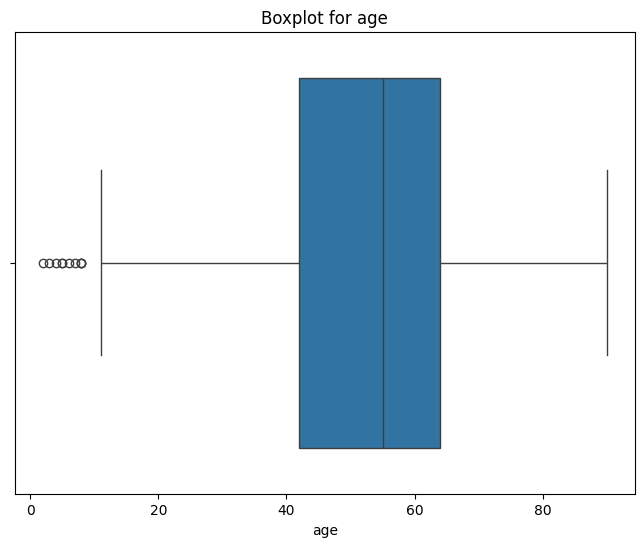

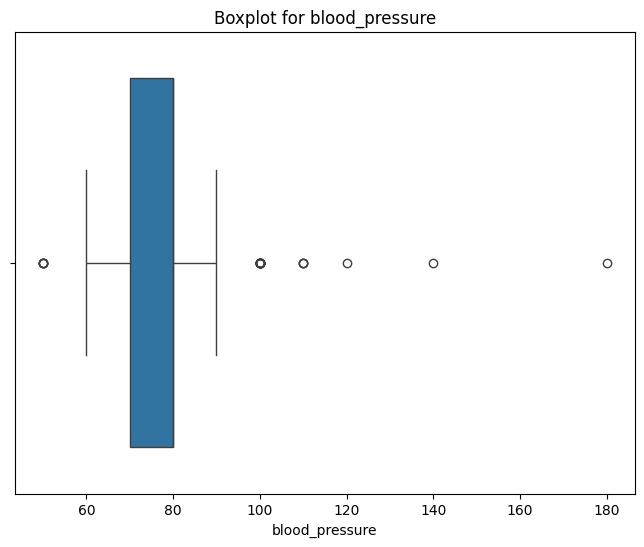

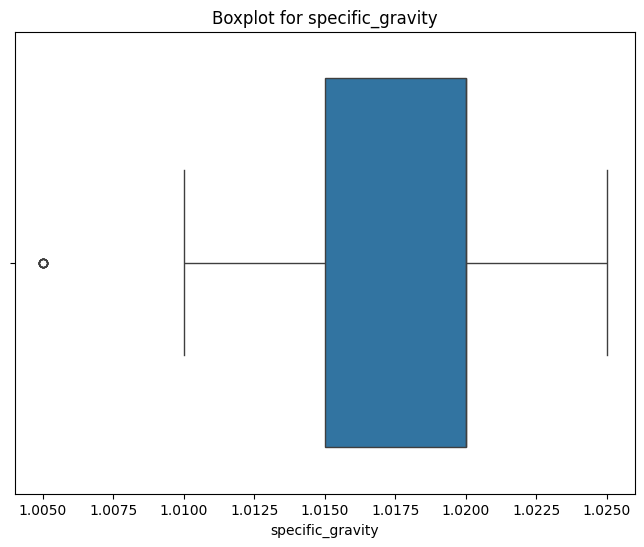

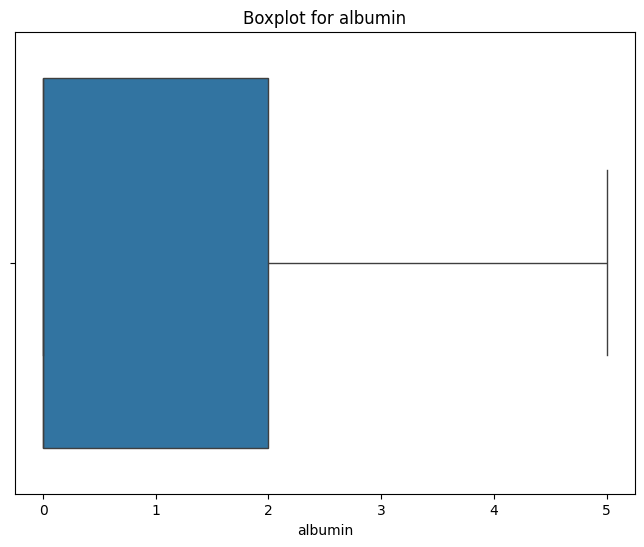

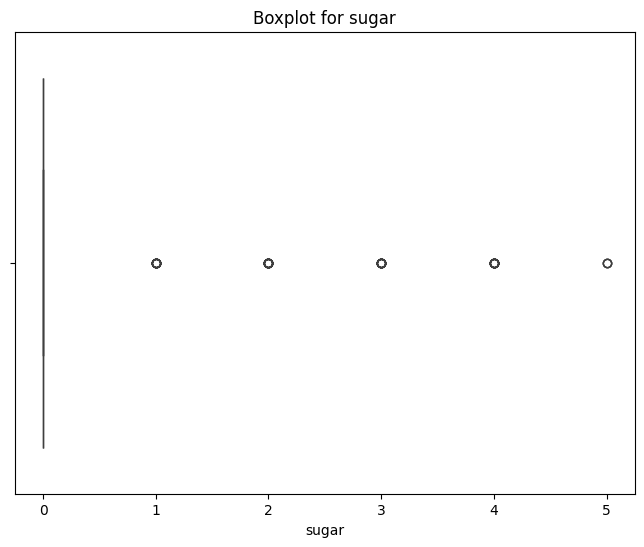

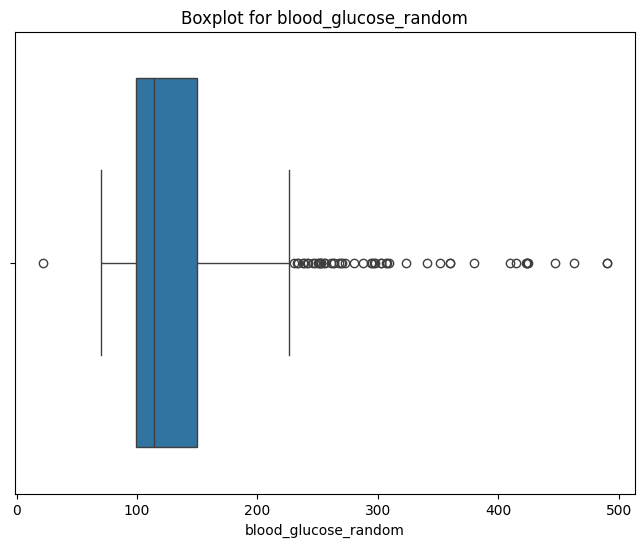

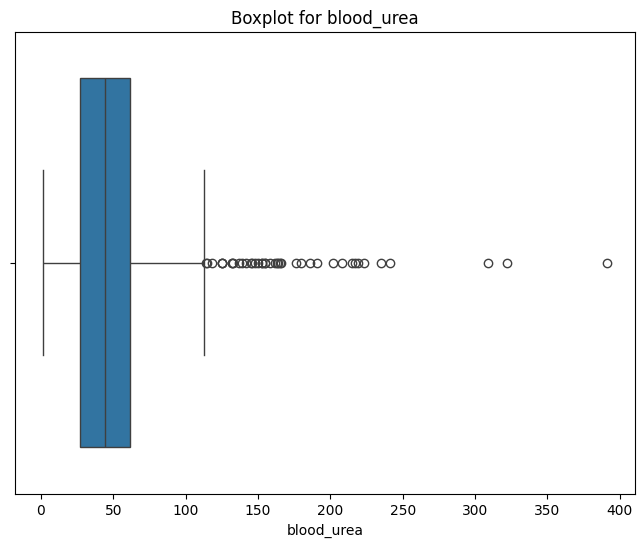

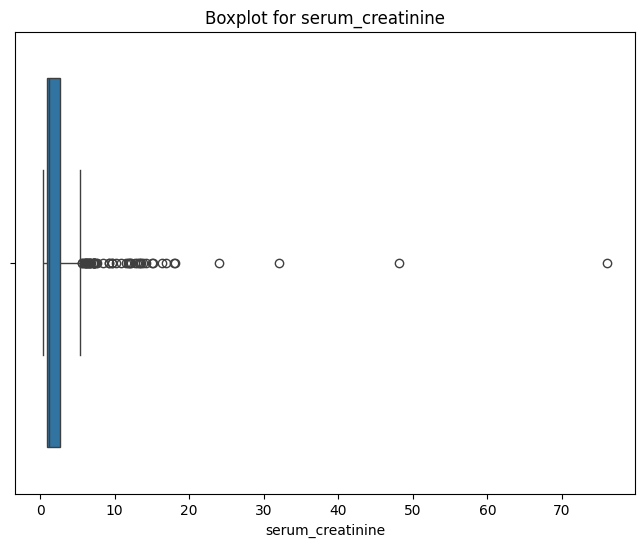

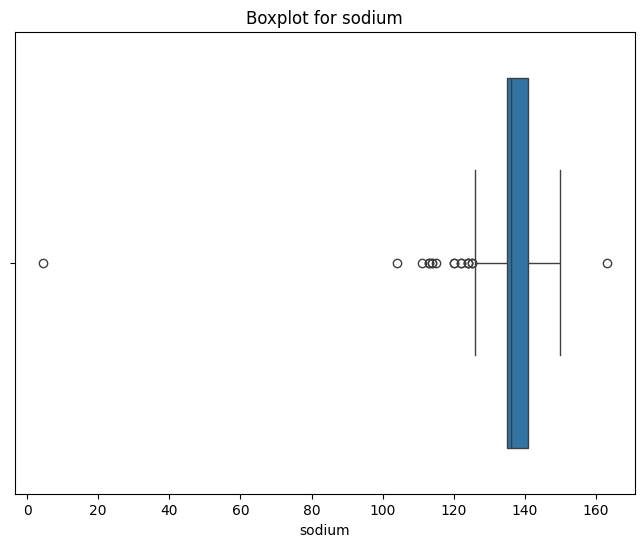

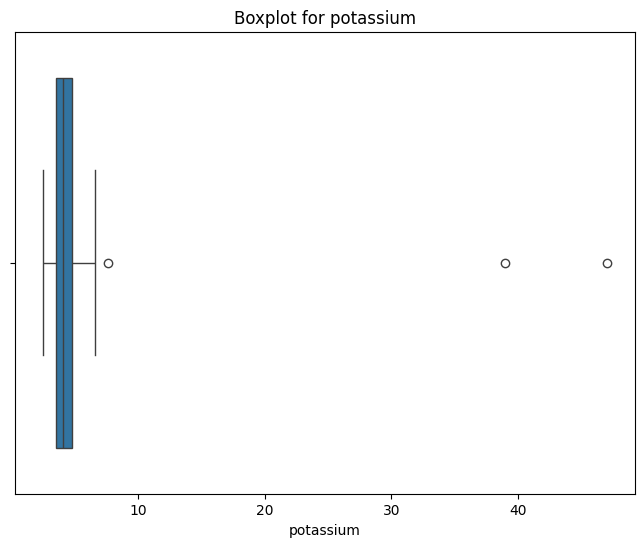

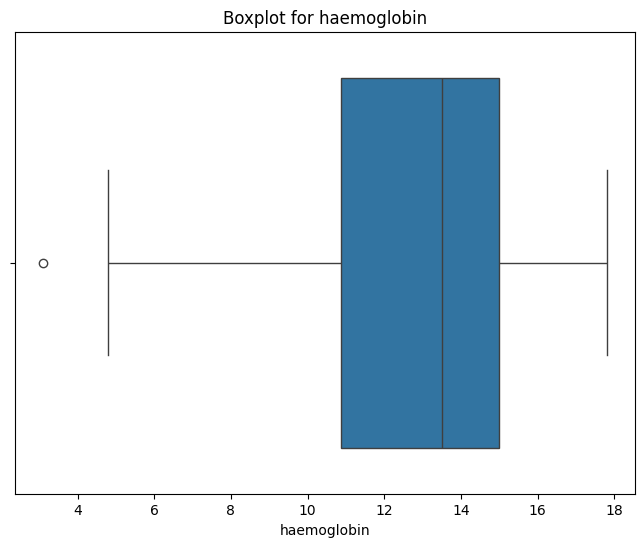

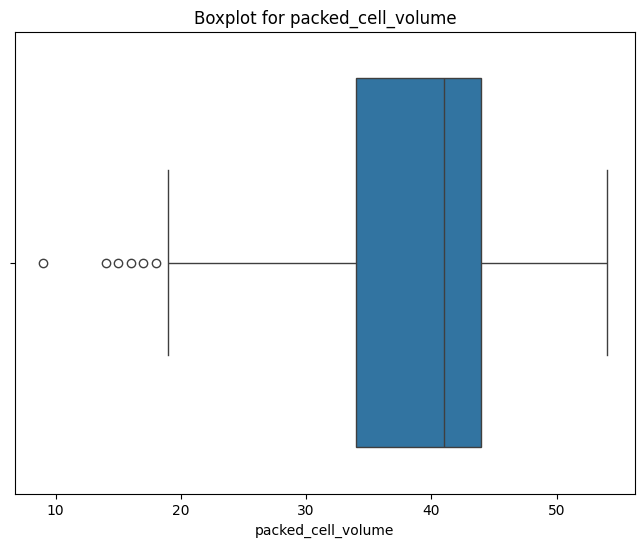

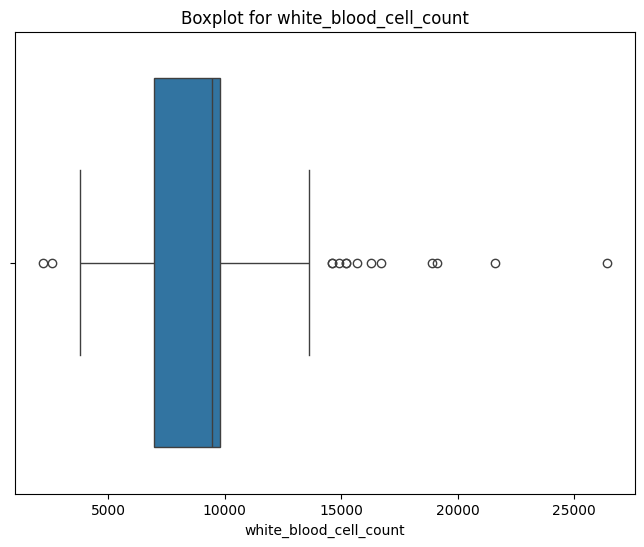

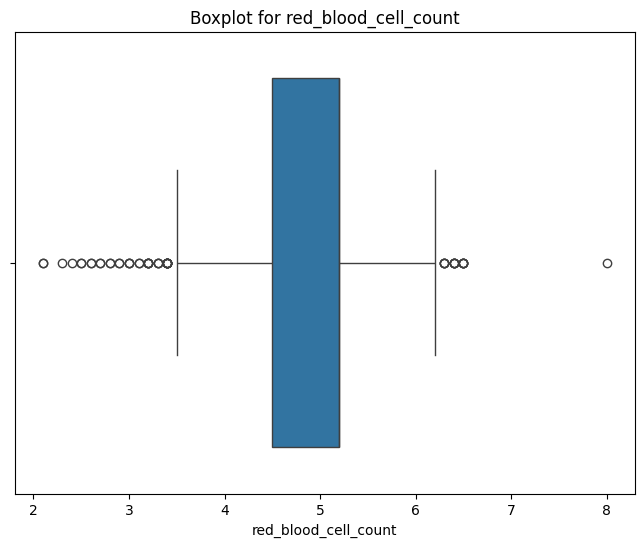

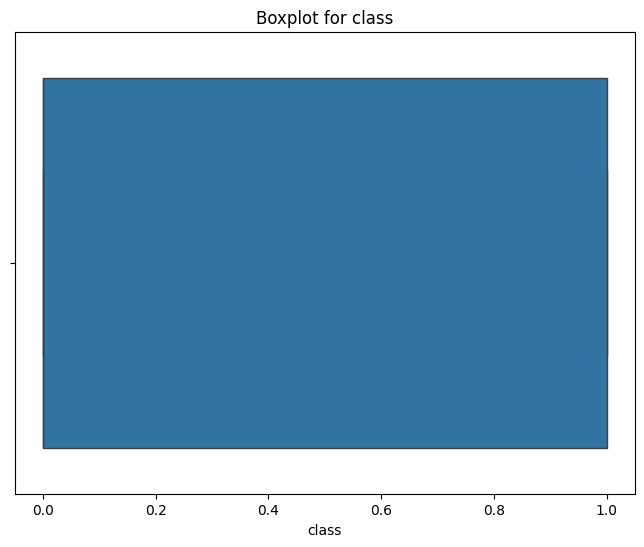

In [42]:
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [43]:
for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound,upper=upper_bound)

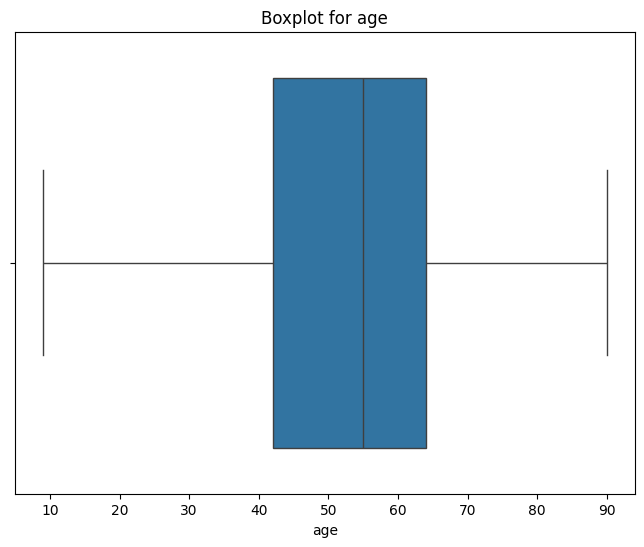

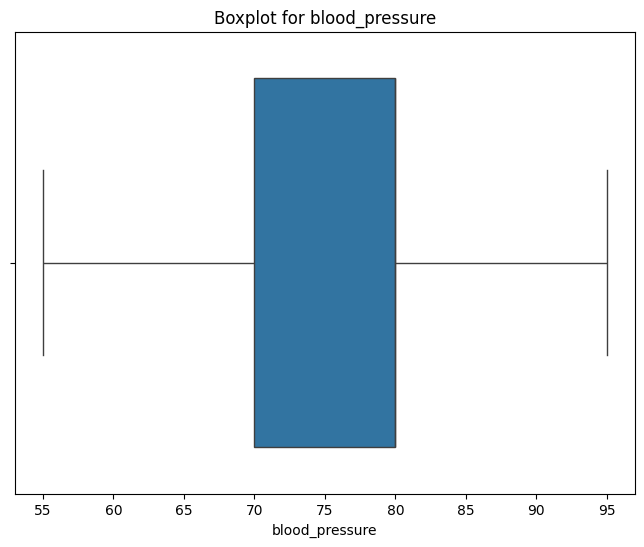

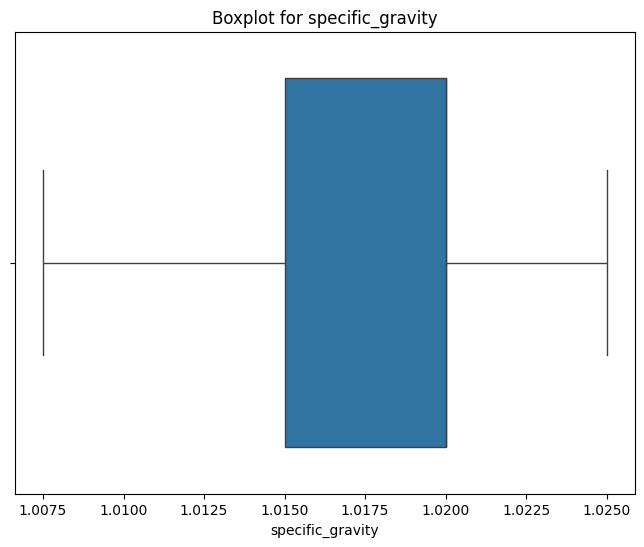

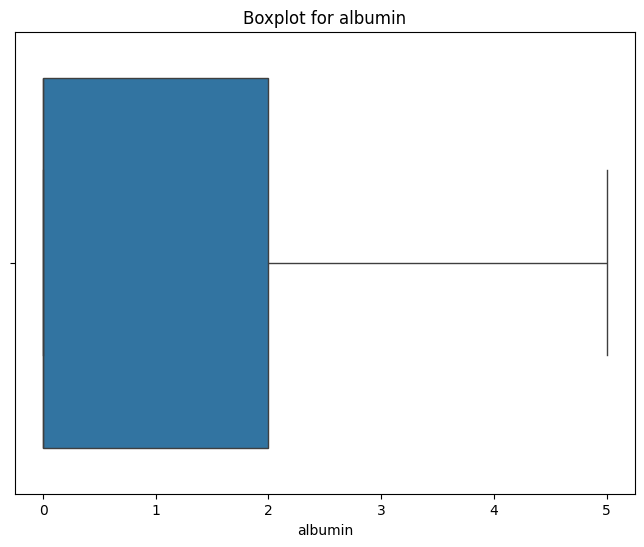

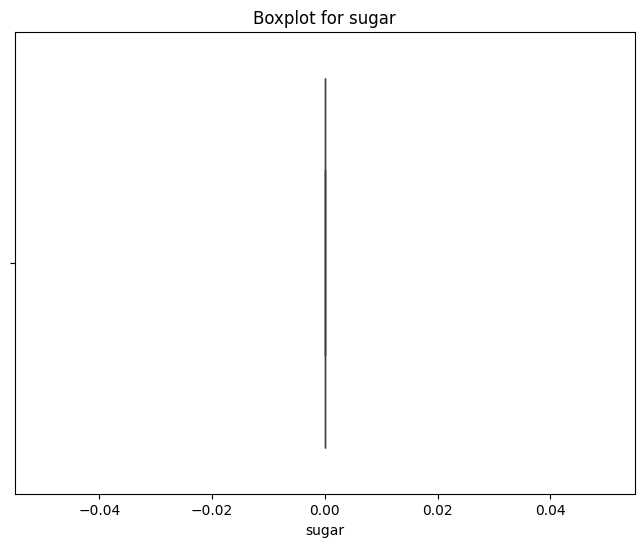

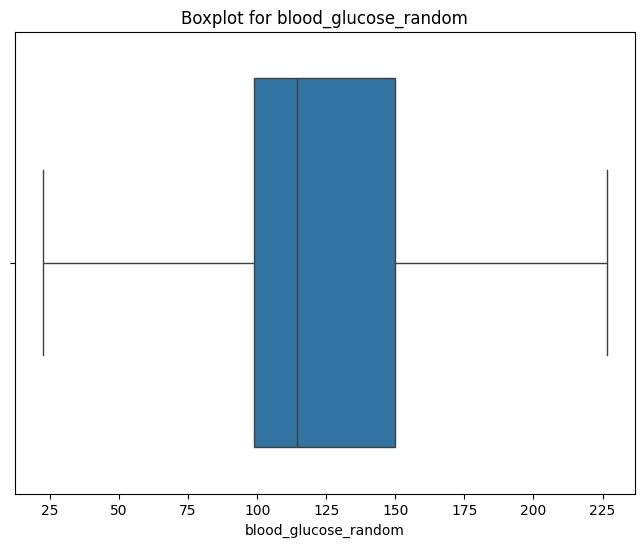

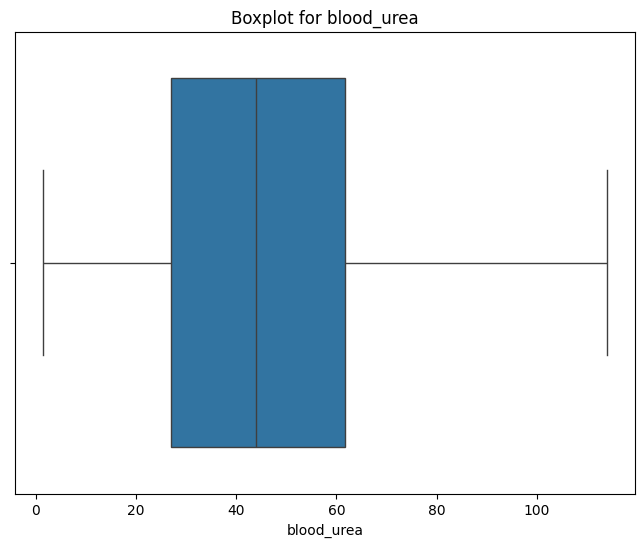

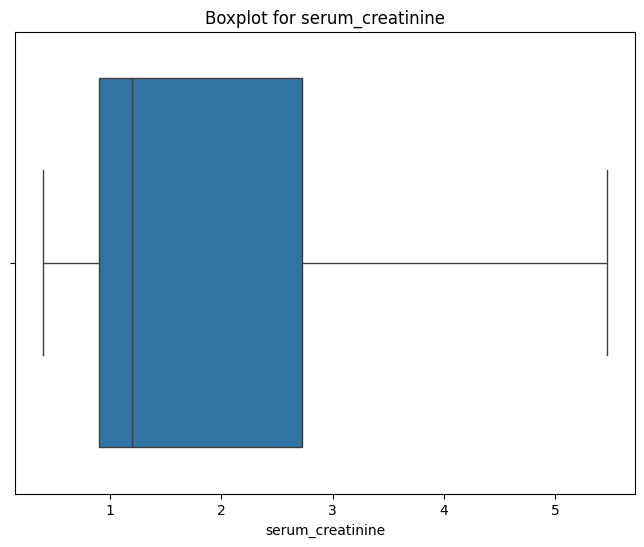

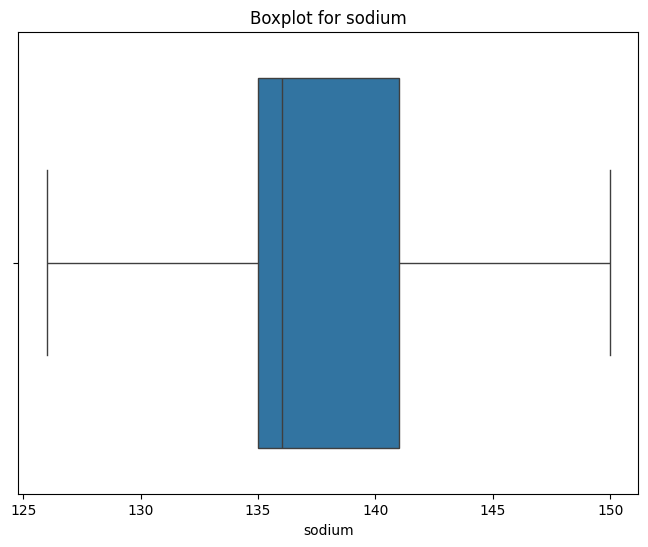

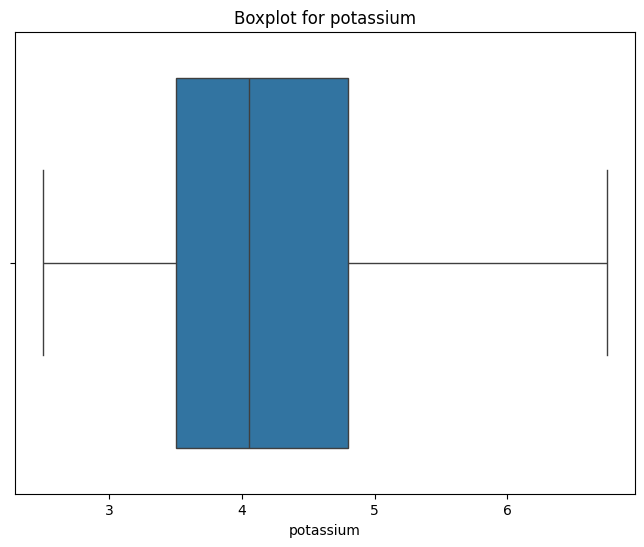

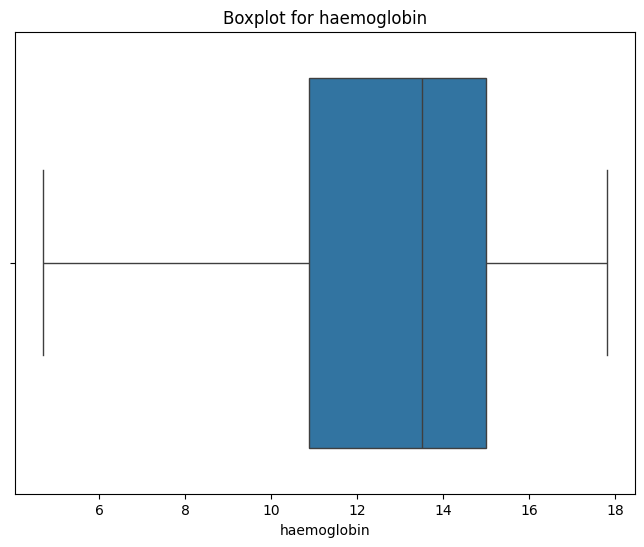

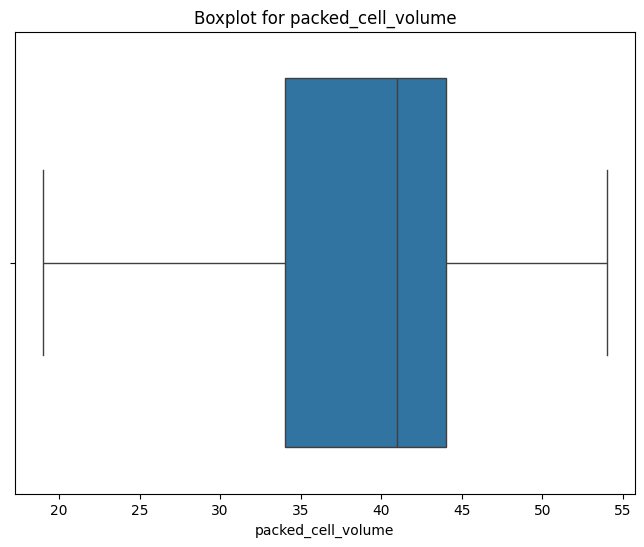

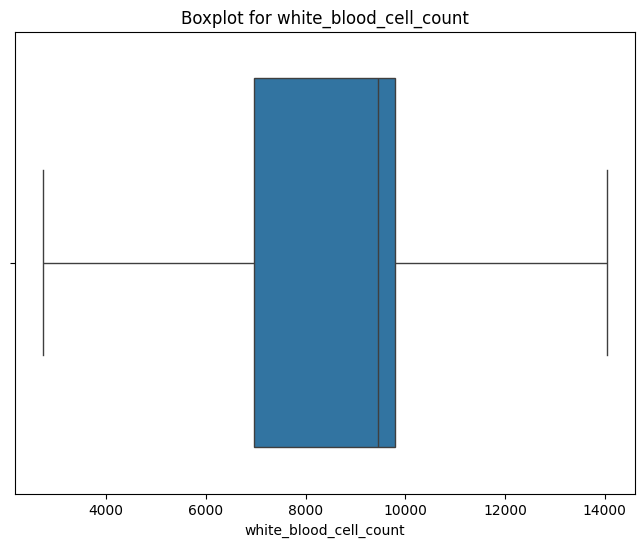

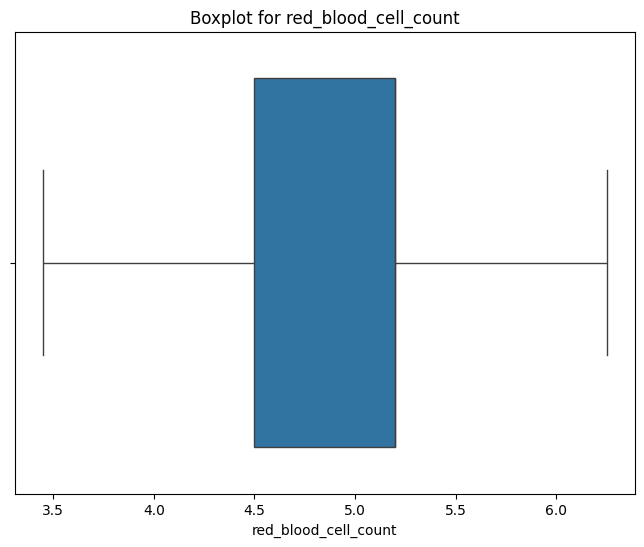

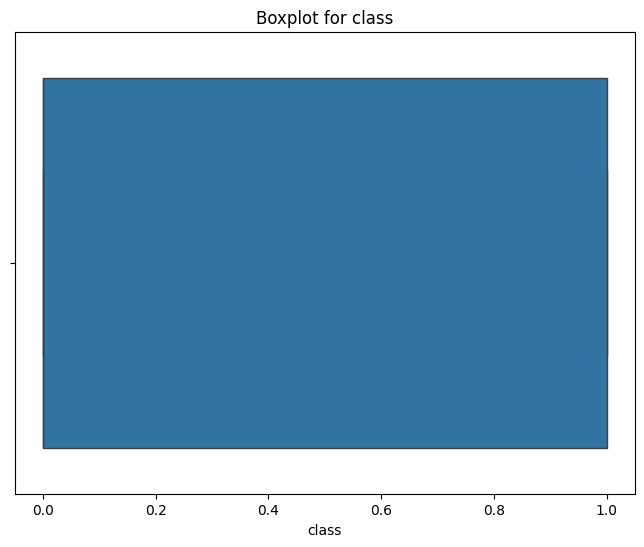

In [44]:
for col in num_col:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()


### Model building

In [45]:
x = data.drop('class',axis=1)
x

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia
0,48.0,80.0,1.0200,1.0,0.0,1,1,0,0,121.0,...,15.4,44.0,7800.0,5.2,1,1,0,0,0,0
1,9.0,55.0,1.0200,4.0,0.0,1,1,0,0,99.0,...,11.3,38.0,6000.0,5.2,0,0,0,0,0,0
2,62.0,80.0,1.0100,2.0,0.0,1,1,0,0,226.5,...,9.6,31.0,7500.0,5.2,0,1,0,1,0,1
3,48.0,70.0,1.0075,4.0,0.0,1,0,1,0,117.0,...,11.2,32.0,6700.0,3.9,1,0,0,1,1,1
4,51.0,80.0,1.0100,2.0,0.0,1,1,0,0,106.0,...,11.6,35.0,7300.0,4.6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.0200,0.0,0.0,1,1,0,0,140.0,...,15.7,47.0,6700.0,4.9,0,0,0,0,0,0
396,42.0,70.0,1.0250,0.0,0.0,1,1,0,0,75.0,...,16.5,54.0,7800.0,6.2,0,0,0,0,0,0
397,12.0,80.0,1.0200,0.0,0.0,1,1,0,0,100.0,...,15.8,49.0,6600.0,5.4,0,0,0,0,0,0
398,17.0,60.0,1.0250,0.0,0.0,1,1,0,0,114.0,...,14.2,51.0,7200.0,5.9,0,0,0,0,0,0


In [46]:
y = data['class']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: class, Length: 400, dtype: int64

### Splitting data into training and test set

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [49]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [50]:
classifiers = {
    'Random Forest Classifier':RandomForestClassifier(n_estimators=47,random_state=34),
    'Logistic Regression' : LogisticRegression(random_state=42),
    'SVM':SVC(kernel='linear'),
    'KNN':KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes':GaussianNB(),
    'Decision tree' : DecisionTreeClassifier(random_state=42,max_depth=5),
    'Gradient Boosting':GradientBoostingClassifier(n_estimators=600,learning_rate=0.05,random_state=42),
    'AdaBoost':AdaBoostClassifier(n_estimators=50,random_state=42,learning_rate=0.3),
    #'XGBoost':XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}

In [51]:
results=[]

In [52]:
for name,clf in classifiers.items():
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    cm_result = confusion_matrix(y_test, y_pred)  
    cr_result = classification_report(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')
    print(f'{name} Confusion Matrix:\n{cm_result}')
    print(f'{name} Classification Report:\n{cr_result}')
    print("\n\n")
    results.append({'Model Name':name,'Accuracy Score':accuracy*100})

Random Forest Classifier Accuracy: 100.00%
Random Forest Classifier Confusion Matrix:
[[72  0]
 [ 0 48]]
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120




Logistic Regression Accuracy: 92.50%
Logistic Regression Confusion Matrix:
[[67  5]
 [ 4 44]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94        72
           1       0.90      0.92      0.91        48

    accuracy                           0.93       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.93      0.93      0.93       120




SVM Accuracy: 93.33%
SVM Confusion Matrix:
[[67  5

In [53]:
models = pd.DataFrame(results)
df_unique = models.drop_duplicates(subset=['Model Name'], keep='last')
df_unique

,Model Name,Accuracy Score
0,Random Forest Classifier,100.000000
1,Logistic Regression,92.500000
2,SVM,93.333333
3,KNN,75.000000
4,Naive Bayes,96.666667
5,Decision tree,98.333333
6,Gradient Boosting,100.000000
7,AdaBoost,100.000000


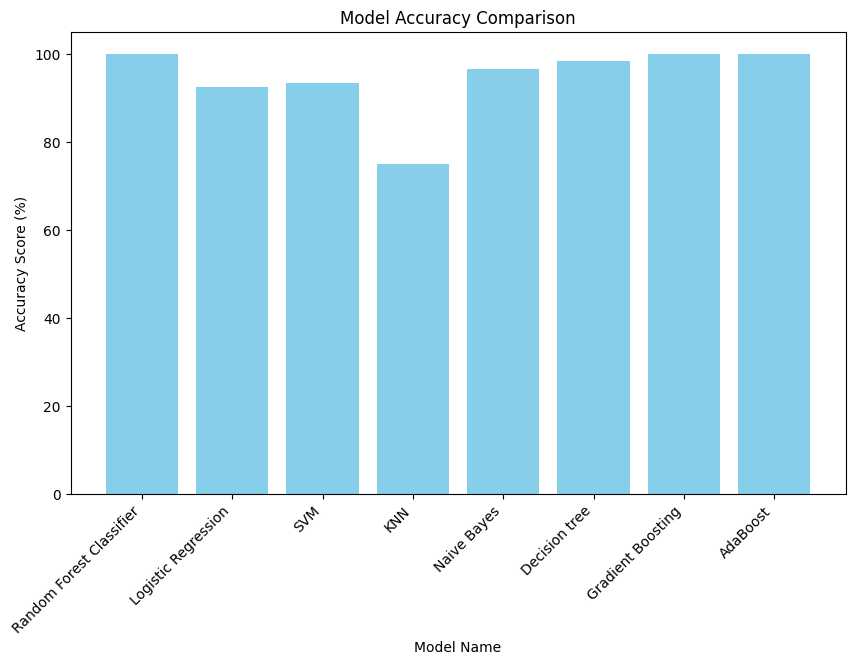

In [54]:

# Plotting the accuracy scores
plt.figure(figsize=(10,6))
plt.bar(df_unique['Model Name'], df_unique['Accuracy Score'], color='skyblue')
plt.xlabel('Model Name')
plt.ylabel('Accuracy Score (%)')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility
plt.show()